### NLP Sentiment Analysis Exercise

In [1]:
# import numpy 
import numpy as np 

# import pandas
import pandas as pd 

# import regex
import re

# import nltk
import nltk 
import string

In [2]:
# load data
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

**Task:** Print the top 5 rows.

In [3]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Task:** Use the `'text'` column to create an array with the name `'features'`.



In [4]:
features = airline_tweets['text']

airline_tweets['text']**Task:** Use `'airline_sentiment'` column to create an array with the name `'labels'`.

In [5]:
labels = airline_tweets['airline_sentiment']

In [6]:
print(features.shape)
print(labels.shape)

(14640,)
(14640,)


**Task:** Clean the text data in the `'features'` array.

    - Remove all the special characters.
    - Remove all single characters.
    - Remove single characters from the start.
    - Substituting multiple spaces with single space.
    - Converting all text to lowercase.

In [36]:
import string
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    text= features[sentence]
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Remove all single characters
    

    # Remove single characters from the start
    text = ' '.join( [w for w in text.split() if len(w)>1] )

    # Substituting multiple spaces with single space
    
    # remove emoji - maybe I need these! 
    text = emoji_pattern.sub(r'', text)

    # Converting to Lowercase
#     text = text.split()
    processed_features.append(text)
   

In [38]:
# processed_features

In [30]:
features[7]

'@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP'

**Task:** Import stopwords from nltk.

In [39]:
from nltk.corpus import stopwords

**Task:** Import TfidfVectorizer from sklearn.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Task:** Instatiate TfidfVectorizer with following parameters:

    - max_features = 2500
    - min_df = 7 (document frequency = df: default 1 - ignore terms higher than this amount when building vocab)
    - max_df = 0.8 (min frequency ( default 1 - if < 1 then represents the perpotion of documents containing)
    - stop_words = stopwords.words('english')
    
    


In [41]:


vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words=stopwords.words('english'))
# useidf=True??

**Bonus:** How would you determine optimal paraemeters for TfidfVectorizer? Discuss with your peers and/or mentors. Write down your answer below.

In [ ]:
# grid search
# look at the errors its making and change scorer

**Task:** Transform features with vectorizer. 

In [42]:
X=vectorizer.fit_transform(processed_features)

**Task:** Import train_test_split from sklearn and split the data.

In [43]:
y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Task:** Import any classifier of your choice from sklearn (e.g. Random Forest, LogReg, Naive Bayes).

In [44]:
from sklearn import naive_bayes
# from sklearn import naive_bayes


**Task:** Fit your classifier to data.

In [45]:
clf=naive_bayes.MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

**Task:** Predict X_test.

In [51]:
y_pred = clf.predict(X_test)



**Task:** Import confusion matrix and accuracy_score.

In [56]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy_score(y_test, y_pred)

0.7601092896174864

**Task:** Print confusion matrix.

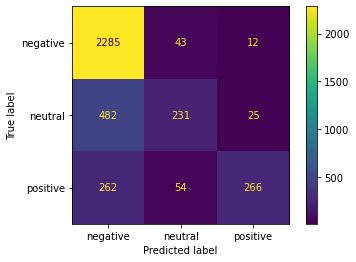

In [59]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

**Task:** Print accaccuracy_score.

In [60]:
# roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])